In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
import anndata
import scanpy as sc
import scvelo as scv

For the barcodes file, need to remove the -1 from cellRanger. Can do this in vim:

:1,$s/-1//g

In [2]:
## from https://github.com/alexdobin/STAR/issues/774#issuecomment-850477636

def buildAnndataFromStarCurr(path, barcodes):
    """Generate an anndata object from the STAR aligner output folder"""
    path=path
    # Load Read Counts
    X = sc.read_mtx(path+'Gene/raw/matrix.mtx')

    # Transpose counts matrix to have Cells as rows and Genes as cols as expected by AnnData objects
    X = X.X.transpose()

    # Load the 3 matrices containing Spliced, Unspliced and Ambigous reads
    mtxU = np.loadtxt(path+'Velocyto/raw/unspliced.mtx', skiprows=3, delimiter=' ')
    mtxS = np.loadtxt(path+'Velocyto/raw/spliced.mtx', skiprows=3, delimiter=' ')
    mtxA = np.loadtxt(path+'Velocyto/raw/ambiguous.mtx', skiprows=3, delimiter=' ')

    # Extract sparse matrix shape informations from the third row
    shapeU = np.loadtxt(path+'Velocyto/raw/unspliced.mtx', skiprows=2, max_rows = 1 ,delimiter=' ')[0:2].astype(int)
    shapeS = np.loadtxt(path+'Velocyto/raw/spliced.mtx', skiprows=2, max_rows = 1 ,delimiter=' ')[0:2].astype(int)
    shapeA = np.loadtxt(path+'Velocyto/raw/ambiguous.mtx', skiprows=2, max_rows = 1 ,delimiter=' ')[0:2].astype(int)

    # Read the sparse matrix with csr_matrix((data, (row_ind, col_ind)), shape=(M, N))
    # Subract -1 to rows and cols index because csr_matrix expects a 0 based index
    # Traspose counts matrix to have Cells as rows and Genes as cols as expected by AnnData objects

    spliced = sparse.csr_matrix((mtxS[:,2], (mtxS[:,0]-1, mtxS[:,1]-1)), shape = shapeS).transpose()
    unspliced = sparse.csr_matrix((mtxU[:,2], (mtxU[:,0]-1, mtxU[:,1]-1)), shape = shapeU).transpose()
    ambiguous = sparse.csr_matrix((mtxA[:,2], (mtxA[:,0]-1, mtxA[:,1]-1)), shape = shapeA).transpose()

    # Load Genes and Cells identifiers
    obs = pd.read_csv(path+'Velocyto/raw/barcodes.tsv',header = None, index_col = 0)

    # Remove index column name to make it compliant with the anndata format
    obs.index.name = None

    var = pd.read_csv(path+'Velocyto/raw/features.tsv', sep='\t',names = ('gene_ids', 'feature_types'), index_col = 1)
  
    # Build AnnData object to be used with ScanPy and ScVelo
    adata = anndata.AnnData(X = X, obs = obs, var = var, layers = {'spliced': spliced, 'unspliced': unspliced, 'ambiguous': ambiguous})
    adata.var_names_make_unique()

    # Subset Cells based on STAR filtering
    selected_barcodes = pd.read_csv(barcodes, header = None)
    adata = adata[selected_barcodes[0]]

    return adata.copy()
                                    

In [3]:
fetal_list = []

AnnData object with n_obs × n_vars = 24312 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'spliced', 'unspliced', 'ambiguous'


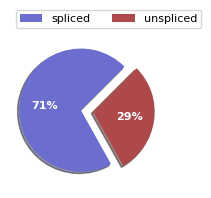

In [4]:
#HK2716
adata = buildAnndataFromStarCurr('/home/levinsj/Fetal_dir/Velocyto/00_StarSolo/HK2716Solo.out/', '/home/levinsj/Fetal_dir/Velocyto/CellBenderBarcodes/HK2716_output_cell_barcodes_final.csv')

## adding back in the '-1' so matches barcodes from original anndata object
adata.obs.index = adata.obs.index + "-1"
fetal_list.append(adata)

print(adata)

adata.write('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2716_scv.h5ad')
adata = scv.read('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2716_scv.h5ad', cache=True)
scv.pl.proportions(adata)

AnnData object with n_obs × n_vars = 17835 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'spliced', 'unspliced', 'ambiguous'


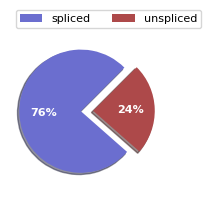

In [5]:
#HK2718
adata = buildAnndataFromStarCurr('/home/levinsj/Fetal_dir/Velocyto/00_StarSolo/HK2718Solo.out/', '/home/levinsj/Fetal_dir/Velocyto/CellBenderBarcodes/HK2718_output_cell_barcodes_final.csv')

adata.obs.index = adata.obs.index + "-1"
fetal_list.append(adata)

print(adata)

adata.write('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2718_scv.h5ad')
adata = scv.read('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2718_scv.h5ad', cache=True)
scv.pl.proportions(adata)

AnnData object with n_obs × n_vars = 31475 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'spliced', 'unspliced', 'ambiguous'


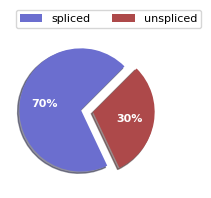

In [6]:
#HK2722
adata = buildAnndataFromStarCurr('/home/levinsj/Fetal_dir/Velocyto/00_StarSolo/HK2722Solo.out/', '/home/levinsj/Fetal_dir/Velocyto/CellBenderBarcodes/HK2722_output_cell_barcodes_final.csv')

adata.obs.index = adata.obs.index + "-1"
fetal_list.append(adata)

print(adata)

adata.write('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2722_scv.h5ad')
adata = scv.read('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2722_scv.h5ad', cache=True)
scv.pl.proportions(adata)


AnnData object with n_obs × n_vars = 18228 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'spliced', 'unspliced', 'ambiguous'


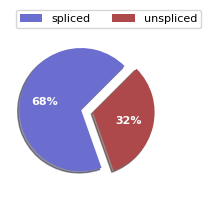

In [7]:
#HK2723
adata = buildAnndataFromStarCurr('/home/levinsj/Fetal_dir/Velocyto/00_StarSolo/HK2723Solo.out/', '/home/levinsj/Fetal_dir/Velocyto/CellBenderBarcodes/HK2723_output_cell_barcodes_final.csv')

adata.obs.index = adata.obs.index + "-1"
fetal_list.append(adata)

print(adata)

adata.write('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2723_scv.h5ad')
adata = scv.read('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2723_scv.h5ad', cache=True)
scv.pl.proportions(adata)

AnnData object with n_obs × n_vars = 32471 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'spliced', 'unspliced', 'ambiguous'


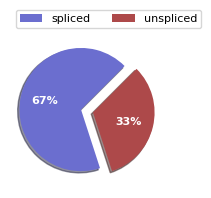

In [8]:
#HK2725
adata = buildAnndataFromStarCurr('/home/levinsj/Fetal_dir/Velocyto/00_StarSolo/HK2725Solo.out/', '/home/levinsj/Fetal_dir/Velocyto/CellBenderBarcodes/HK2725_output_cell_barcodes_final.csv')

adata.obs.index = adata.obs.index + "-1"
fetal_list.append(adata)

print(adata)

adata.write('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2725_scv.h5ad')
adata = scv.read('/home/levinsj/Fetal_dir/Velocyto/01_importSCV/HK2725_scv.h5ad', cache=True)
scv.pl.proportions(adata)

In [9]:
!mkdir -p /home/levinsj/Fetal_dir/Velocyto/02_mergedSCV
adata_fetal = fetal_list[0].concatenate(fetal_list[1:], batch_key='sample')
adata_fetal.write('/home/levinsj/Fetal_dir/Velocyto/02_mergedSCV/allFetal.h5ad')

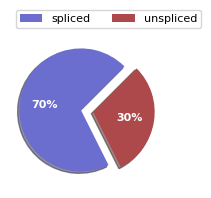

AnnData object with n_obs × n_vars = 124321 × 36601
    obs: 'sample'
    var: 'gene_ids', 'feature_types'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [10]:
adata_all = scv.read('/home/levinsj/Fetal_dir/Velocyto/02_mergedSCV/allFetal.h5ad', cache=True)
scv.pl.proportions(adata_all)
print(adata_all)